<a href="https://colab.research.google.com/github/shivjaiswal-coder/Distance-Estimation/blob/main/Copy_of_Distance_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

Capture23.PNG      large/           Untitled6.pdf
DenseDepth/        layers.py        Untitled88.pdf
depth_sequential/  png_depth/       weight_small-001--769.41736.hdf5
file_newout23.csv  __pycache__/     weight_small-004--662.94891.hdf5
file_out.csv       small_model.h5   weight_small-019--575.17578.hdf5
final1.csv         Untitled188.pdf  weight_small-106--559.35547.hdf5
final.csv          Untitled199.pdf  weights_small.h5
image/             Untitled2.pdf


In [ ]:
cd drive

/content/drive


In [ ]:
%ls

MyDrive/  Shareddrives/


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
cd dataset

/content/drive/.shortcut-targets-by-id/1prhBAhKIwBBTFQyTsZo53aZccIIcANTT/dataset


In [ ]:
%ls

Capture23.PNG      large/           Untitled6.pdf
DenseDepth/        layers.py        Untitled88.pdf
depth_sequential/  png_depth/       weight_small-001--769.41736.hdf5
file_newout23.csv  __pycache__/     weight_small-004--662.94891.hdf5
file_out.csv       small_model.h5   weight_small-019--575.17578.hdf5
final1.csv         Untitled188.pdf  weight_small-106--559.35547.hdf5
final.csv          Untitled199.pdf  weights_small.h5
image/             Untitled2.pdf


##expand

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
data=pd.read_csv("file_newout23.csv")
data=data[((data["class_id"]==24) | (data["class_id"]==38) | (data["class_id"]==39) | (data["class_id"]==41) | (data["class_id"]==63))]
# backpack 24
# bottle 39
# cup 41
# laptop 63
# racket 38
# tv 62
# remote 65
# keyboard 66
# microwave 68
# suitcase 28
dicti={
    24:56,
    39:25,
    41:10,
    62:25,
    63:25,
    65:15,
    66:20,
    68:25,
    38:60,
    28:25,
    26:56,
    34:60,
    40:10
}
dicti_width={
    24:25,
    39:8,
    41:6,
    62:30,
    63:30,
    65:8,
    66:30,
    68:30,
    38:25,
    28:30,
    26:25,
    34:25,
    40:6
}
data["height"]=[dicti[x] for x in data.class_id]
data["width"]=[dicti_width[x] for x in data.class_id]
data["area"]=data["width"]*data["height"]
data.head(20)

pix0  pix1  pix2  pix3  pix4  ...     y  class_id  height  width  area
0     36   224   247    36   223  ...  92.0      39.0      25      8   200
1     39   195   253    40   194  ...  88.0      24.0      56     25  1400
2     69   140   245    74   133  ...  75.0      39.0      25      8   200
3     40   195   253    41   189  ...  80.0      24.0      56     25  1400
4     74   133   242    75   131  ...  95.0      39.0      25      8   200
5     37   228   246    37   230  ...  91.0      24.0      56     25  1400
6     54   164   251    55   163  ...  86.0      39.0      25      8   200
7     50   172   252    50   172  ...  87.0      24.0      56     25  1400
8     36   210   251    36   219  ...  65.0      39.0      25      8   200
9     77   128   240    78   126  ...  77.0      24.0      56     25  1400
10   109    84   213   108    86  ...  73.0      39.0      25      8   200
11    52   169   252    53   166  ...  91.0      24.0      56     25  1400
12    36   221   248    36   224  ...  77.0      24.0      56     25  1400
13   141    45   180   141    45  ...  79.0      39.0      25      8   200
14    38   236   243    38   235  ...  75.0      24.0      56     25  1400
15    58   157   250    61   153  ...  74.0      39.0      25      8   200
16   152    29   163   151    32  ...  50.0      39.0      25      8   200
18    55   162   251    58   157  ...  69.0      24.0      56     25  1400
19   115    76   208   116    76  ...  94.0      39.0      25      8   200
20    93   106   228    94   104  ...  90.0      24.0      56     25  1400

[20 rows x 3081 columns]

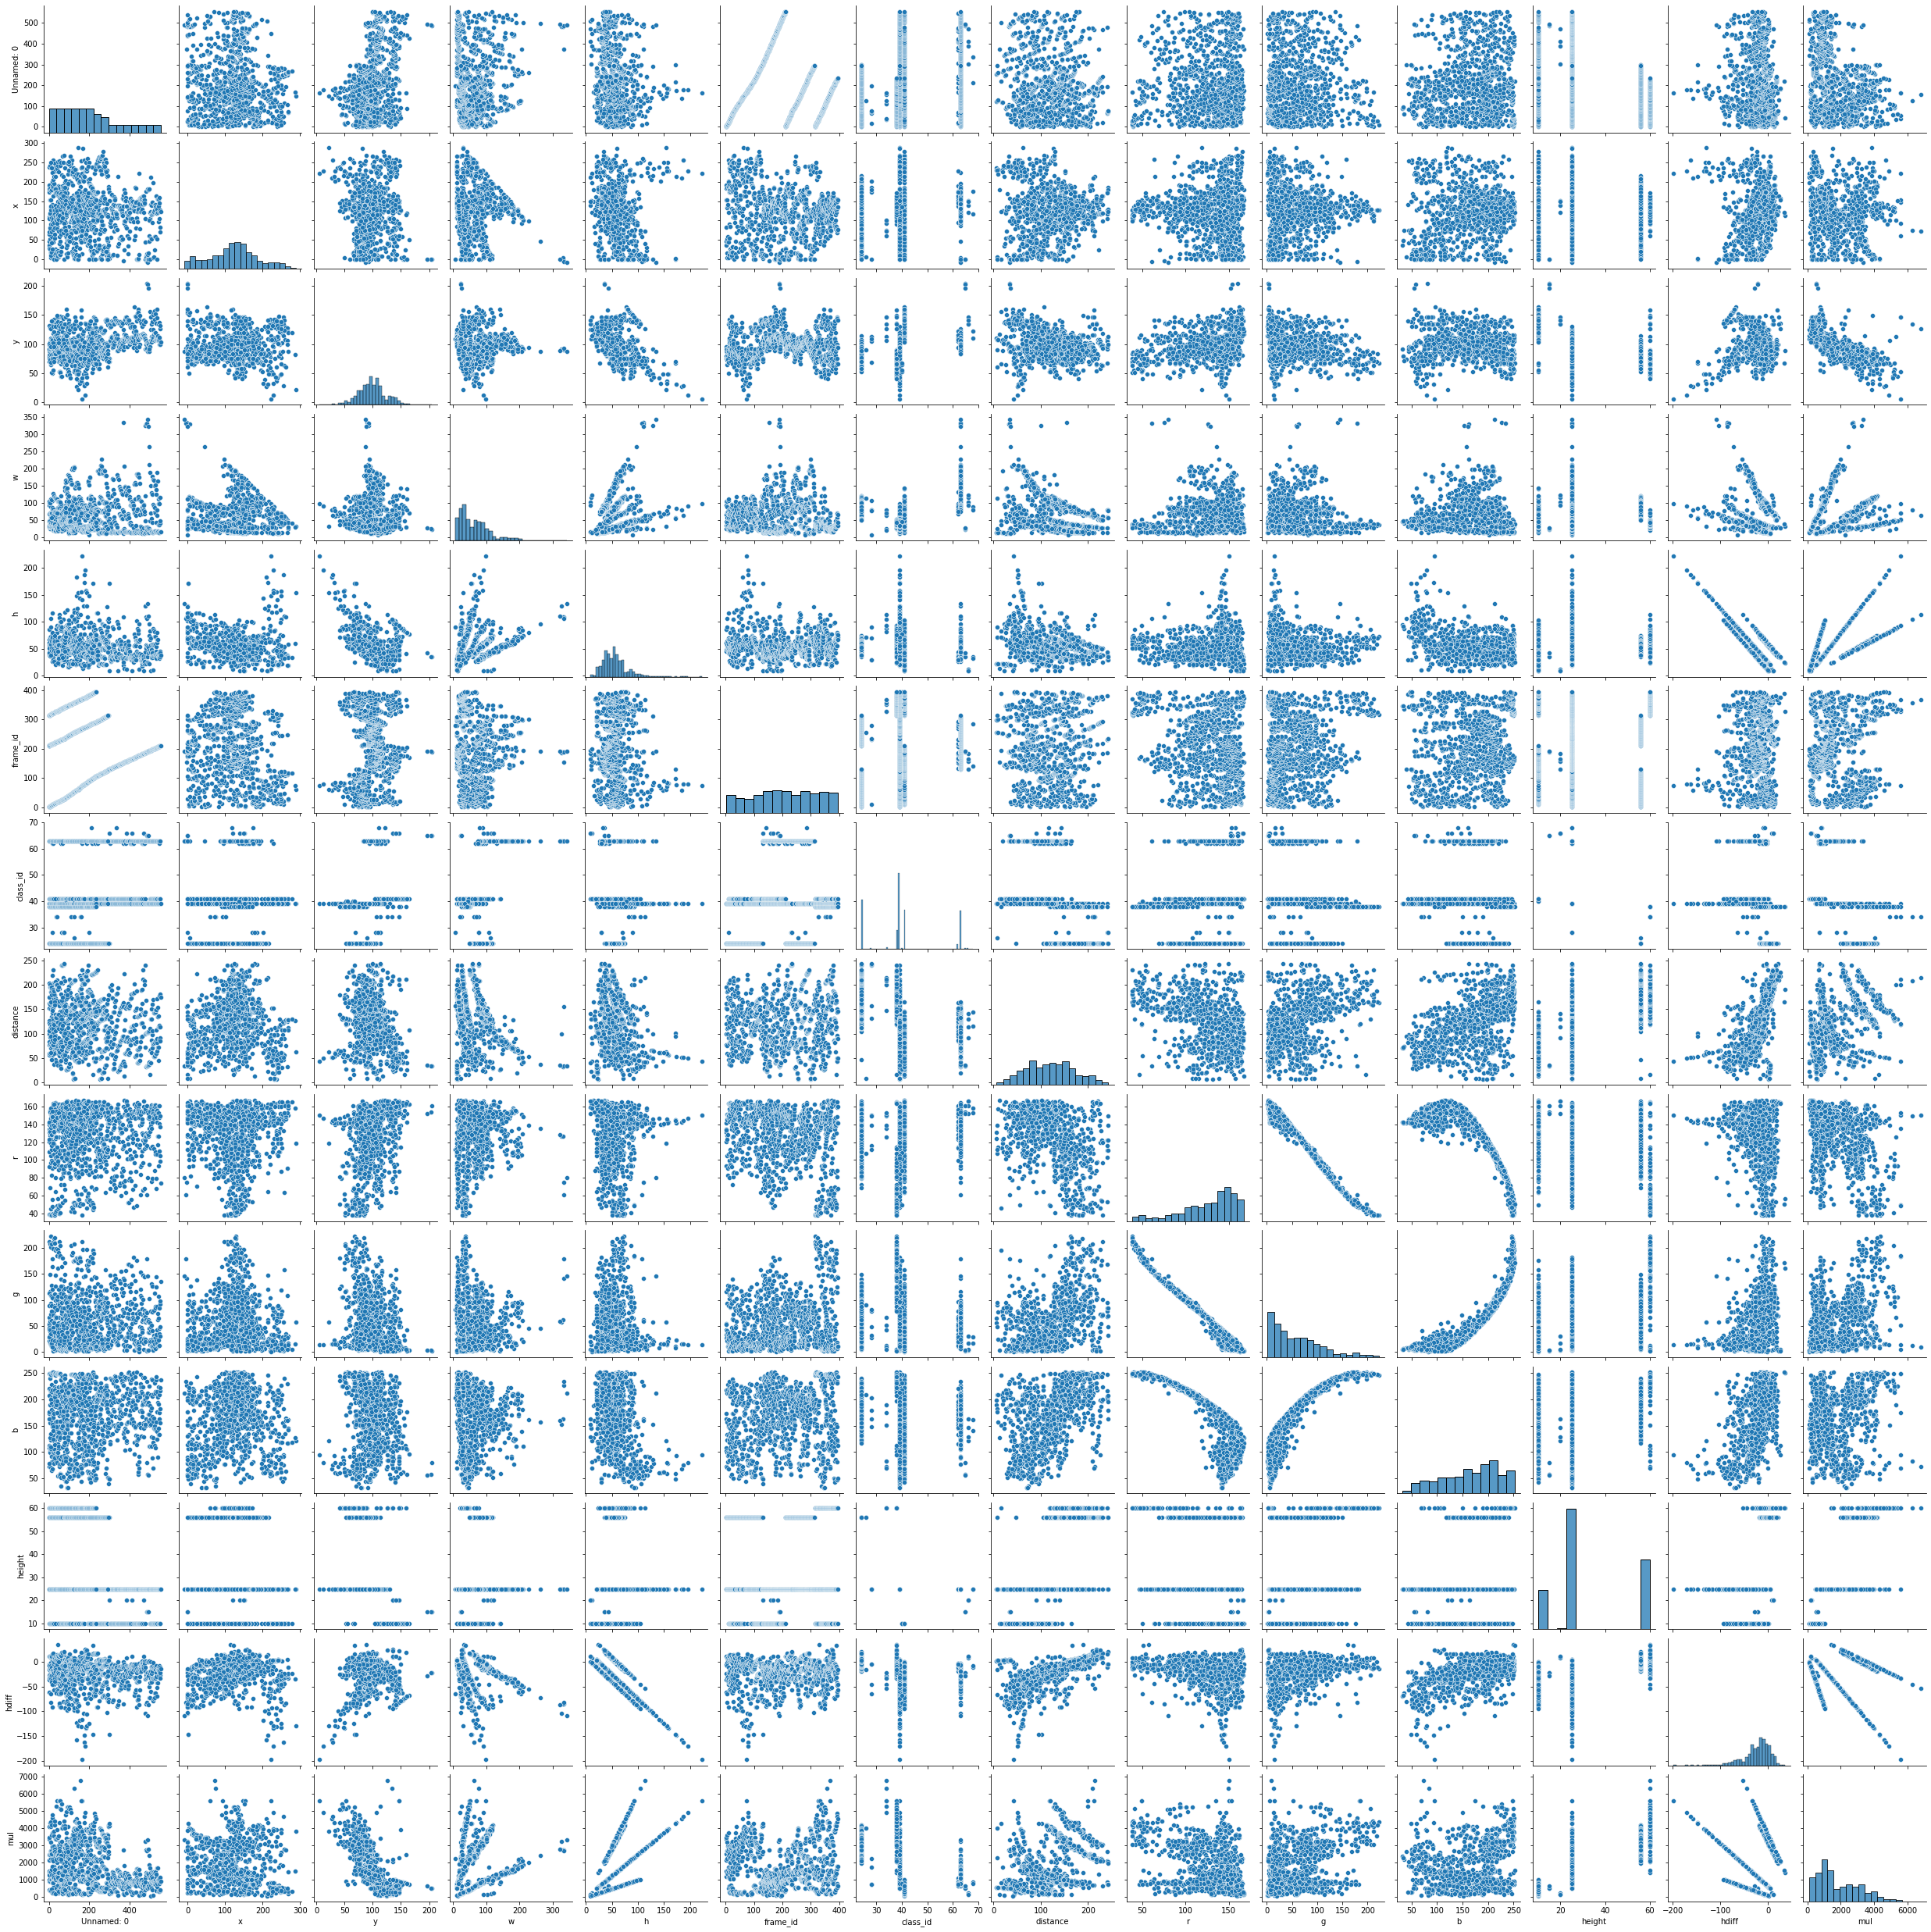

In [ ]:
#sns.pairplot(data)

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[09:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  0.2485561255100953


In [ ]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()

model1.fit(X_train,y_train)

coeff_df = pd.DataFrame(model1.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
x         -0.067543
y          0.115026
w         -0.386711
h          0.085785
r          0.297804
g          0.239429
b          0.196187
height     0.386488
hdiff      0.165828
width      0.167736
wdiff      0.474514
area       0.464941
test       0.207193

In [ ]:
predictions=NN_model.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

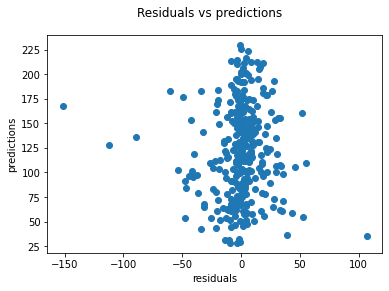

In [ ]:
predictions=model_load.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('Residuals vs predictions')

#X-label
plt.xlabel('residuals')

# Y-label
plt.ylabel('predictions')
pred_reshaped=predictions.reshape((312))
yt=y_test.values-pred_reshaped
plt.scatter(yt,pred_reshaped)

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

Exception: ignored

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2 = metrics.r2_score(y_test,predictions)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 12.584274903627541
MSE: 456.7103668441328
RMSE: 21.37078301897553
R2: 0.8287172691468294
R2_adj: 0.8194273583208947


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train,y_train)

[15:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions=NN_model.predict(X_test)

In [ ]:
data=pd.read_csv("final1.csv")
data=data[((data["class_id"]==24) | (data["class_id"]==38) | (data["class_id"]==39) | (data["class_id"]==41) | (data["class_id"]==63))]
# backpack 24
# bottle 39
# cup 41
# tv 62
# laptop 63
# remote 65
# keyboard 66
# microwave 68
# racket 38
# suitcase 28
dicti={
    24:56,
    39:25,
    41:10,
    62:35,
    63:35,
    65:15,
    66:20,
    68:35,
    38:60,
    28:35,
    26:56,
    34:60,
    40:10
}
dicti_width={
    24:25,
    39:8,
    41:6,
    62:30,
    63:30,
    65:8,
    66:30,
    68:30,
    38:25,
    28:30,
    26:25,
    34:25,
    40:6
}
data["height"]=[dicti[x] for x in data.class_id]
data["width"]=[dicti_width[x] for x in data.class_id]
data["area"]=data["width"]*data["height"]
data.head(20)

Unnamed: 0      x     y      w  ...           b  height  width  area
0            0   36.0  92.0   33.0  ...  107.366120      25      8   200
1            1  183.0  88.0   93.0  ...  172.580287      56     25  1400
2            2   47.0  75.0   44.0  ...   72.433404      25      8   200
3            3  192.0  80.0  104.0  ...  162.793114      56     25  1400
4            4   83.0  95.0   25.0  ...  102.135000      25      8   200
5            5  153.0  91.0   66.0  ...  217.969024      56     25  1400
6            6   53.0  86.0   30.0  ...   99.775000      25      8   200
7            7  134.0  87.0   72.0  ...  211.995660      56     25  1400
8            8   16.0  65.0   43.0  ...   70.637468      25      8   200
9            9  154.0  77.0   88.0  ...  123.120016      56     25  1400
10          10    4.0  73.0   57.0  ...  133.494015      25      8   200
11          11  186.0  91.0  104.0  ...  157.346004      56     25  1400
12          13  137.0  77.0   69.0  ...  227.542874      56     25  1400
13          12   58.0  79.0   27.0  ...   80.852538      25      8   200
14          15  141.0  75.0   74.0  ...  219.523712      56     25  1400
15          14   45.0  74.0   33.0  ...   93.768158      25      8   200
16          16    4.0  50.0   53.0  ...   67.508466      25      8   200
18          18  200.0  69.0  110.0  ...  150.421167      56     25  1400
19          19  121.0  94.0   22.0  ...   98.793478      25      8   200
20          20  185.0  90.0   68.0  ...  161.281806      56     25  1400

[20 rows x 15 columns]

In [ ]:
import math
data["hdiff"]=data["height"]-data["h"]
data["wdiff"]=data["width"]-data["w"]
data['area']=data['h']*data['w']
data["area_original"]=data["height"]*data["width"]
data["area_diff"]=data["area_original"]-data["area"]
data["g2"]=data["g"]*data["g"]
data["sqrtg2"]=[math.sqrt(x) for x in data["g"]]
data['mix']=data['r']*data['g']*data['b']
data['mul']=data['h']/data['height']
data['test']=data['b']*data['hdiff']
data_train,data_test=train_test_split(data,test_size=0.3,random_state=100)
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
d=['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test','distance']

#scaling the training data(fitting the parameters and transforming the values)
data_train[d]=scaler.fit_transform(data_train[d])
#transforming the test data.We avoid fitting the values to prevent data leakage!
data_test[d]=scaler.transform(data_test[d])
y_train=data_train['distance']
X_train=data_train[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test','area_diff','area_original','mul']]
X_test=data_test[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test','area_diff','area_original','mul']]
y_test=data_test['distance']

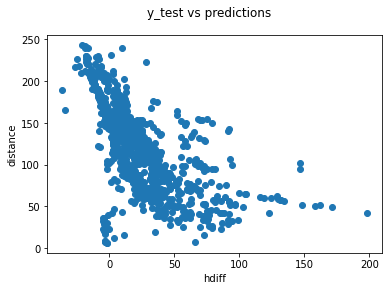

In [ ]:
predictions=XGBModel.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('hdiff')

# Y-label
plt.ylabel('distance')
plt.scatter(data['hdiff'],data['distance'])

In [ ]:
from sklearn import metrics
pred_train=NN_model.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
R2 = metrics.r2_score(y_train,pred_train)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 7.751051351316684
MSE: 200.7942994611849
RMSE: 14.17019052310818
R2: 0.9216534382833587
R2_adj: 0.9198903651645595


##**Deep Learning**

In [ ]:
X_train.shape

(728, 3083)

In [ ]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
X_train.shape[1]

16

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 16, activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, decay=1e-6, momentum=0.95, nesterov=True)
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_80 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_81 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_82 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_83 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                

In [ ]:
checkpoint_name = 'NN-model_new/weight_small-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
data['area']=data['h']*data['w']
data["hdiff"]=data["height"]-data["h"]
data["wdiff"]=data["width"]-data["w"]
data['area']=data['h']*data['w']
data_train,data_test=train_test_split(data,test_size=0.3,random_state=100)
y_train=data_train['y_actual']
X_train=data_train.drop(columns=['y_actual','class_id'],axis=1)
X_test=data_test.drop(columns=['y_actual','class_id'],axis=1)
y_test=data_test['y_actual']

In [ ]:
history=NN_model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split = 0.2,callbacks=callbacks_list)

Epoch 1/100
582/582 [==============================] - 2s 3ms/step - loss: 8.4917 - mean_absolute_error: 8.4917 - val_loss: 11.9513 - val_mean_absolute_error: 11.9513

Epoch 00001: val_loss did not improve from 11.02021
Epoch 2/100
582/582 [==============================] - 1s 2ms/step - loss: 8.1576 - mean_absolute_error: 8.1576 - val_loss: 12.3637 - val_mean_absolute_error: 12.3637

Epoch 00002: val_loss did not improve from 11.02021
Epoch 3/100
582/582 [==============================] - 1s 2ms/step - loss: 6.9776 - mean_absolute_error: 6.9776 - val_loss: 11.8175 - val_mean_absolute_error: 11.8175

Epoch 00003: val_loss did not improve from 11.02021
Epoch 4/100
582/582 [==============================] - 1s 2ms/step - loss: 7.5148 - mean_absolute_error: 7.5148 - val_loss: 11.8229 - val_mean_absolute_error: 11.8229

Epoch 00004: val_loss did not improve from 11.02021
Epoch 5/100
582/582 [==============================] - 1s 2ms/step - loss: 7.3321 - mean_absolute_error: 7.3321 - val_lo

In [ ]:
NN_model.save_weights("weights_small.h5")

In [ ]:
NN_model.save("small_model.h5")

In [ ]:
NN_model.load_weights("NN-model_new/weight_small-030--10.96504.hdf5")

In [ ]:
training_loss = history.history['mean_absolute_error'][0:100]
test_loss = history.history['val_mean_absolute_error'][0:100]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
model_load = Sequential()

# The Input Layer :
model_load.add(Dense(128, kernel_initializer='normal',input_dim = 3081, activation='relu'))
model_load.add(Dense(1024, kernel_initializer='normal',activation='relu'))
model_load.add(Dense(2048, kernel_initializer='normal',activation='relu'))
model_load.add(Dense(512, kernel_initializer='normal',activation='relu'))
# The Hidden Layers :
model_load.add(Dense(256, kernel_initializer='normal',activation='relu'))
model_load.add(Dense(128, kernel_initializer='normal',activation='relu'))
model_load.add(Dense(128, kernel_initializer='normal',activation='relu'))
model_load.add(Dense(64, kernel_initializer='normal',activation='relu'))
model_load.add(Dense(32, kernel_initializer='normal',activation='relu'))


# The Output Layer :
model_load.add(Dense(1, kernel_initializer='normal',activation='linear'))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, decay=1e-6, momentum=0.99, nesterov=True)
# Compile the network :
model_load.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
model_load.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               394496    
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              132096    
_________________________________________________________________
dense_49 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_50 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 128)              

In [ ]:
checkpoint_name = 'large_new/weight_large-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
model_load.load_weights('large/weight_large-1176--11.04565.hdf5')

In [ ]:
history=model_load.fit(X_train, y_train, epochs=1500, batch_size=8, validation_split = 0.2,callbacks=callbacks_list)

Epoch 1/1500
73/73 [==============================] - 3s 36ms/step - loss: 260.2718 - mean_absolute_error: 260.2718 - val_loss: 77.8554 - val_mean_absolute_error: 77.8554

Epoch 00001: val_loss improved from inf to 77.85539, saving model to large_new/weight_large-001--77.85539.hdf5
Epoch 2/1500
73/73 [==============================] - 2s 32ms/step - loss: 102.4772 - mean_absolute_error: 102.4772 - val_loss: 112.4130 - val_mean_absolute_error: 112.4130

Epoch 00002: val_loss did not improve from 77.85539
Epoch 3/1500
73/73 [==============================] - 2s 33ms/step - loss: 114.5202 - mean_absolute_error: 114.5202 - val_loss: 78.0452 - val_mean_absolute_error: 78.0452

Epoch 00003: val_loss did not improve from 77.85539
Epoch 4/1500
73/73 [==============================] - 2s 32ms/step - loss: 91.5999 - mean_absolute_error: 91.5999 - val_loss: 93.6530 - val_mean_absolute_error: 93.6530

Epoch 00004: val_loss did not improve from 77.85539
Epoch 5/1500
73/73 [=========================

KeyboardInterrupt: ignored

In [ ]:
model = Sequential()

# The Input Layer :
model.add(Dense(32, kernel_initializer='normal',input_dim = 16, activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
model.add(Dense(32, kernel_initializer='normal',activation='relu'))
model.add(Dense(16, kernel_initializer='normal',activation='relu'))


# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, decay=1e-6, momentum=0.95, nesterov=True)
# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                

In [ ]:
model.load_weights("weight_small-106--559.35547.hdf5")

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

NameError: ignored

##**Different models start from here**

##1

In [ ]:
data=pd.read_csv("final1.csv")
data=data[((data["class_id"]==24) | (data["class_id"]==38) | (data["class_id"]==39) | (data["class_id"]==41) | (data["class_id"]==63))]
dicti={
    24:56,39:25,41:10,62:35,63:35,65:15,66:20,68:35,38:60,28:35,26:56,34:60,40:10
}
dicti_width={
    24:25,39:8,41:6,62:30,63:30,65:8,66:30,68:30,38:25,28:30,26:25,34:25,40:6
}
data["height"]=[dicti[x] for x in data.class_id]
data["width"]=[dicti_width[x] for x in data.class_id]
data["area"]=data["width"]*data["height"]
data.head(20)
import math
data["hdiff"]=data["height"]-data["h"]
data["wdiff"]=data["width"]-data["w"]
data['area']=data['h']*data['w']
data["area_original"]=data["height"]*data["width"]
data["area_diff"]=data["area_original"]-data["area"]
data["g2"]=data["g"]*data["g"]
data["sqrtg2"]=[math.sqrt(x) for x in data["g"]]
data['mix']=data['r']*data['g']*data['b']
data['mul']=data['h']/data['height']
data['test']=data['b']*data['hdiff']
data_train,data_test=train_test_split(data,test_size=0.3,random_state=100)
y_train=data_train['distance']
X_train=data_train[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area_original','area','area_diff','mul','test']]
X_test=data_test[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area_original','area','area_diff','mul','test']]
y_test=data_test['distance']

In [ ]:
X_train.shape

(728, 14)

In [ ]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()

model1.fit(X_train,y_train)

coeff_df = pd.DataFrame(model1.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
x                -0.030203
y                 0.366355
w                 0.248686
h                 0.721409
r                 0.372844
g                 0.227215
b                 0.064974
height            1.895817
hdiff             1.174408
width             1.346871
wdiff             1.098185
area_original    -0.030293
area             -0.012919
area_diff        -0.017374

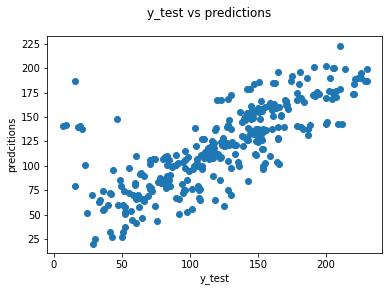

In [ ]:
predictions=model1.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
predictions=model1.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2 = metrics.r2_score(y_test,predictions)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 22.124441718002572
MSE: 1018.0322123210018
RMSE: 31.906617061684898
R2: 0.6182014903061183
R2_adj: 0.6002042541589319


In [ ]:
from sklearn import metrics
pred_train=model1.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
R2 = metrics.r2_score(y_train,pred_train)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 19.976871174338726
MSE: 830.8494214114121
RMSE: 28.824458735792632
R2: 0.6758165164722311
R2_adj: 0.6694510623777167


In [ ]:
XGBModel = XGBRegressor(max_depth=7,n_estimators=150)
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[12:41:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  11.688951538159298


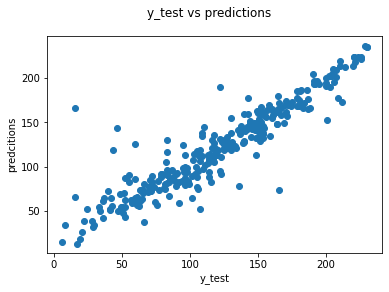

In [ ]:
predictions=XGBModel.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
predictions=XGBModel.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2 = metrics.r2_score(y_test,predictions)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 11.688951538159298
MSE: 379.1601386466856
RMSE: 19.472034784446272
R2: 0.8578013798398512
R2_adj: 0.8510984145797769


In [ ]:
from sklearn import metrics
pred_train=XGBModel.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
R2 = metrics.r2_score(y_train,pred_train)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 1.0220456984802917
MSE: 2.1848720260619405
RMSE: 1.4781312614453226
R2: 0.9991474996476883
R2_adj: 0.9991307605103358


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=9)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

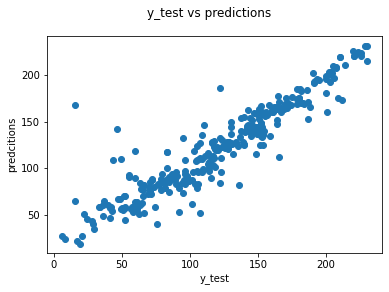

In [ ]:
predictions=regr.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
predictions=regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2 = metrics.r2_score(y_test,predictions)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 11.602852243589743
MSE: 362.37470471233974
RMSE: 19.036142064828674
R2: 0.8640965182285347
R2_adj: 0.8576902934985666


In [ ]:
from sklearn import metrics
pred_train=regr.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
R2 = metrics.r2_score(y_train,pred_train)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 4.214478296703296
MSE: 48.33409145752749
RMSE: 6.952272395233625
R2: 0.9811408496677617
R2_adj: 0.980770543770635


##2

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
data=pd.read_csv("file_newout23.csv")
data=data[((data["class_id"]==24) | (data["class_id"]==38) | (data["class_id"]==39) | (data["class_id"]==41) | (data["class_id"]==63))]
# backpack 24
# bottle 39
# cup 41
# laptop 63
# racket 38
# tv 62
# remote 65
# keyboard 66
# microwave 68
# suitcase 28
dicti={
    24:56,
    39:25,
    41:10,
    62:25,
    63:25,
    65:15,
    66:20,
    68:25,
    38:60,
    28:25,
    26:56,
    34:60,
    40:10
}
dicti_width={
    24:25,
    39:8,
    41:6,
    62:30,
    63:30,
    65:8,
    66:30,
    68:30,
    38:25,
    28:30,
    26:25,
    34:25,
    40:6
}
data["height"]=[dicti[x] for x in data.class_id]
data["width"]=[dicti_width[x] for x in data.class_id]
data["area"]=data["width"]*data["height"]
data.head(20)
data['area_box']=data['h']*data['w']
data["hdiff"]=data["height"]-data["h"]
data["wdiff"]=data["width"]-data["w"]
data['area_diff']=data['area']*data['area_box']
data_train,data_test=train_test_split(data,test_size=0.3,random_state=100)
y_train=data_train['y_actual']
X_train=data_train.drop(columns=['y_actual','class_id'],axis=1)
X_test=data_test.drop(columns=['y_actual','class_id'],axis=1)
y_test=data_test['y_actual']

In [ ]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()

model1.fit(X_train,y_train)

coeff_df = pd.DataFrame(model1.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
pix0          0.227082
pix1          0.454520
pix2          0.013630
pix3          0.075001
pix4         -0.074492
...                ...
area          0.047184
area_box      0.004903
hdiff         0.318582
wdiff         1.046069
area_diff    -0.000007

[3083 rows x 1 columns]

In [ ]:
predictions=model1.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
pred_train=model1.predict(X_train)
print('Train MAE', metrics.mean_absolute_error(y_train, pred_train))
R2 = metrics.r2_score(y_train,pred_train)
print('Train R2',R2)
predictions=model1.predict(X_test)
print('Test MAE', metrics.mean_absolute_error(y_test, predictions))
R2 = metrics.r2_score(y_test,predictions)
print('Test R2',R2)

Train MAE 7.957028125526766e-10
Train R2 1.0
Test MAE 47.78079886790236
Test R2 -0.5497763580049526


In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[15:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  13.499798621886816


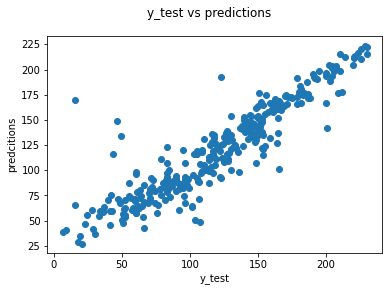

In [ ]:
predictions=XGBModel.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
pred_train=XGBModel.predict(X_train)
print('Train MAE', metrics.mean_absolute_error(y_train, pred_train))
R2 = metrics.r2_score(y_train,pred_train)
print('Train R2',R2)
predictions=XGBModel.predict(X_test)
print('Test MAE', metrics.mean_absolute_error(y_test, predictions))
R2 = metrics.r2_score(y_test,predictions)
print('Test R2',R2)

Train MAE 6.900206690882589
Train R2 0.9622059892134971
Test MAE 13.499798621886816
Test R2 0.83682589325901


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

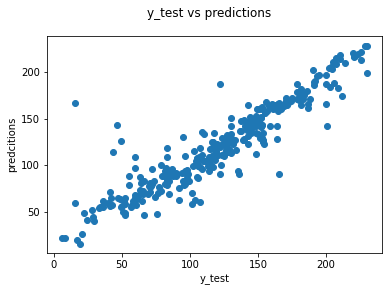

In [ ]:
predictions=regr.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
pred_train=regr.predict(X_train)
print('Train MAE', metrics.mean_absolute_error(y_train, pred_train))
R2 = metrics.r2_score(y_train,pred_train)
print('Train R2',R2)
predictions=regr.predict(X_test)
print('Test MAE', metrics.mean_absolute_error(y_test, predictions))
R2 = metrics.r2_score(y_test,predictions)
print('Test R2',R2)

Train MAE 4.422393818681318
Train R2 0.980235164984054
Test MAE 12.28208974358975
Test R2 0.8528001189025294


In [ ]:
data=pd.read_csv("final1.csv")
data=data[((data["class_id"]==24) | (data["class_id"]==38) | (data["class_id"]==39) | (data["class_id"]==41) | (data["class_id"]==63))]
dicti={
    24:56,39:25,41:10,62:35,63:35,65:15,66:20,68:35,38:60,28:35,26:56,34:60,40:10
}
dicti_width={
    24:25,39:8,41:6,62:30,63:30,65:8,66:30,68:30,38:25,28:30,26:25,34:25,40:6
}
data["height"]=[dicti[x] for x in data.class_id]
data["width"]=[dicti_width[x] for x in data.class_id]
data["area"]=data["width"]*data["height"]
data.head(20)
import math
data["hdiff"]=data["height"]-data["h"]
data["wdiff"]=data["width"]-data["w"]
data['area']=data['h']*data['w']
data["area_original"]=data["height"]*data["width"]
data["area_diff"]=data["area_original"]-data["area"]
data["g2"]=data["g"]*data["g"]
data["logg"]=[math.log(x) for x in data["g"]]
data['mix']=data['r']*data['g']*data['b']
data['mul']=data['h']/data['height']
data['test']=data['b']*data['hdiff']
data_train,data_test=train_test_split(data,test_size=0.3,random_state=100)
y_train=data_train['distance']
X_train=data_train[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test','logg']]
X_test=data_test[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test','logg']]
y_test=data_test['distance']

In [ ]:
data=pd.read_csv("final1.csv")
data=data[((data["class_id"]==24) | (data["class_id"]==38) | (data["class_id"]==39) | (data["class_id"]==41) | (data["class_id"]==63))]
dicti={
    24:56,39:25,41:10,62:35,63:35,65:15,66:20,68:35,38:60,28:35,26:56,34:60,40:10
}
dicti_width={
    24:25,39:8,41:6,62:30,63:30,65:8,66:30,68:30,38:25,28:30,26:25,34:25,40:6
}
data["height"]=[dicti[x] for x in data.class_id]
data["width"]=[dicti_width[x] for x in data.class_id]
data["area"]=data["width"]*data["height"]
data.head(20)
import math
data["hdiff"]=data["height"]-data["h"]
data["wdiff"]=data["width"]-data["w"]
data['area']=data['h']*data['w']
data["area_original"]=data["height"]*data["width"]
data["area_diff"]=data["area_original"]-data["area"]
data["g2"]=data["g"]*data["g"]
data["sqrtg2"]=[math.sqrt(x) for x in data["g"]]
data['mix']=data['r']*data['g']*data['b']
data['mul']=data['h']/data['height']
data['test']=data['b']*data['hdiff']
data_train,data_test=train_test_split(data,test_size=0.3,random_state=100)
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
d=['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test','distance']

#scaling the training data(fitting the parameters and transforming the values)
data_train[d]=scaler.fit_transform(data_train[d])
#transforming the test data.We avoid fitting the values to prevent data leakage!
data_test[d]=scaler.transform(data_test[d])
y_train=data_train['distance']
X_train=data_train[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test']]
X_test=data_test[['x','y','w','h','r','g','b','height','hdiff','width','wdiff','area','test']]
y_test=data_test['distance']

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[09:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  0.2485561255100953


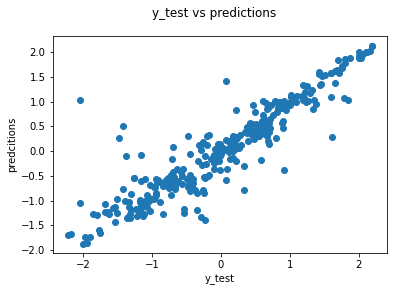

In [ ]:
predictions=XGBModel.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
predictions=XGBModel.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2 = metrics.r2_score(y_test,predictions)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 0.2485561255100953
MSE: 0.16466831434952425
RMSE: 0.4057934380316225
R2: 0.841724320865057
R2_adj: 0.8348196771444051


In [ ]:
from sklearn import metrics
pred_train=XGBModel.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
R2 = metrics.r2_score(y_train,pred_train)
print('R2:',R2)
R2_adj = 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R2_adj:', R2_adj)

MAE: 0.17190159116539663
MSE: 0.06243889250179026
RMSE: 0.24987775511595717
R2: 0.9375611074982098
R2_adj: 0.936424264917645


In [ ]:
path_raw="image/dta/"
path_depth="png_depth/"
save_path="depth_sequential/"
model_path="DenseDepth/"

In [ ]:
import os
import sys
images=[x for x in os.listdir(path_raw)]

In [ ]:
images[0]

'211.png'

In [ ]:
import cv2 as cv
import PIL
from PIL import Image

In [ ]:
image1=cv.imread(path_raw+images[0])

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
cv2_imshow(image1)

In [ ]:
image1.shape

(480, 640, 3)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_H = 480
IMAGE_W = 640

src = np.float32([[230, IMAGE_H], [350, IMAGE_H], [350, 0], [230, 0]])
dst = np.float32([[0, 0], [640, 0], [640, 480], [0, 480]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

img = cv2.imread(path_raw+images[0]) # Read the test img
img = img[0:IMAGE_H, 230:350] # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
plt.show()

TypeError: ignored

In [ ]:
!git clone https://github.com/ialhashim/DenseDepth.git

fatal: destination path 'DenseDepth' already exists and is not an empty directory.


In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2021-03-04 12:19:21--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.61.147
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.61.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  25.2MB/s    in 7.7s    

2021-03-04 12:19:29 (21.5 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



In [ ]:
cd DenseDepth

/content/drive/.shortcut-targets-by-id/1prhBAhKIwBBTFQyTsZo53aZccIIcANTT/dataset/DenseDepth


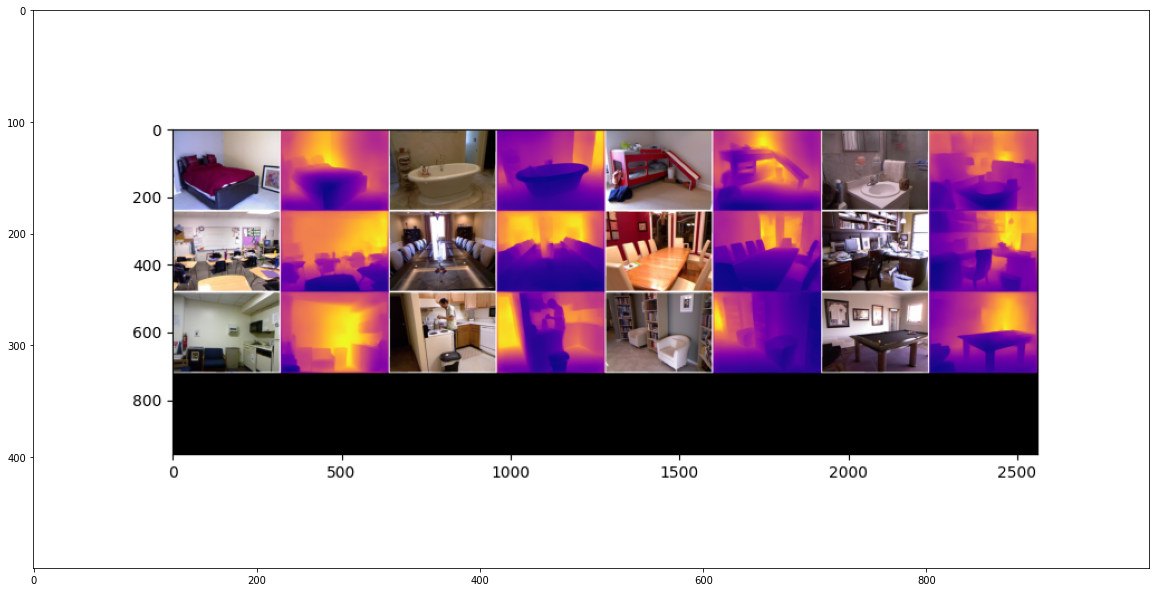

In [ ]:
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(20,20))
plt.imshow( io.imread('./DenseDepth/test.png') )

In [ ]:
import tensorflow as tf
from layers import BilinearUpSampling2D
from keras.models import load_model
model1=load_model("nyu.h5")

print('Model weights loaded.')

ValueError: ignored

In [ ]:
!pip install layers

In [ ]:
cd ..

/content/drive/.shortcut-targets-by-id/1prhBAhKIwBBTFQyTsZo53aZccIIcANTT/dataset


In [ ]:
ls

Capture23.PNG      file_out.csv  png_depth/       Untitled6.pdf
DenseDepth/        final1.csv    Untitled188.pdf  Untitled88.pdf
depth_sequential/  final.csv     Untitled199.pdf
file_newout23.csv  image/        Untitled2.pdf


ModuleNotFoundError: ignored

In [ ]:
import tensorflow as tf
with tf.device("/gpu:0"):
  import os
  import glob
  import argparse
  import matplotlib

  # Keras / TensorFlow
  os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
  from keras.models import load_model
  from layers import BilinearUpSampling2D
  from utils import predict, load_images, display_images,save_images
  from matplotlib import pyplot as plt

  # Custom object needed for inference and training
  custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

  print('Loading model...')

  # Load model into GPU / CPU
  model = load_model("nyu.h5", custom_objects=custom_objects, compile=False)

  print('\nModel loaded ({0}).'.format("nyu.h5"))

  outputs = predict(model, inputs)

  # Display results
  viz = display_images(outputs.copy(), inputs.copy())
  plt.figure(figsize=(10,5))
  plt.imshow(viz)
  plt.savefig('test.png')
  plt.show()

Loading model...

Model loaded (nyu.h5).


In [ ]:
model.name_scope

<bound method Layer._name_scope of <tensorflow.python.keras.engine.functional.Functional object at 0x7f16c500d850>>

In [ ]:
import PIL
from PIL import Image
np_final=np.append(np_final,images[1])

NameError: ignored

In [ ]:
img=Image.open("../"+path_raw+images[0])

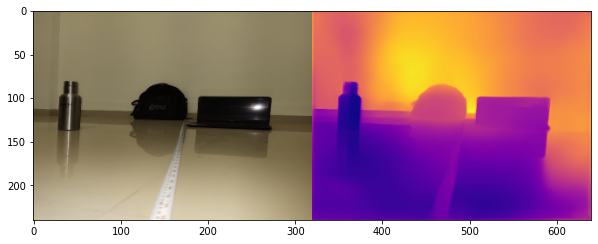

In [ ]:
viz = display_images(img_out,inputs)
plt.figure(figsize=(10,5))
plt.imshow(viz)

In [ ]:
#import numpy as np
#np_image_data = np.asarray(img)
#maybe insert float convertion here - see edit remark!
#np_final = np.expand_dims(np_image_data,axis=0)
inputs = load_images( glob.glob("../"+path_raw+images[0]) )

In [ ]:
img_out=predict(model,inputs)

In [ ]:
model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
img_out[0].shape

(240, 320, 1)

In [ ]:
with tf.device("/gpu:0"):
  i=0
  cap = cv2.VideoCapture("input.mp4")  
  from google.colab.patches import cv2_imshow
  out = cv2.VideoWriter("out.avi",cv2.VideoWriter_fourcc(*'DIVX'), 25, (640,480))
  while(cap.isOpened()): 
      ret, frame = cap.read() 
      if cv2.waitKey(1) & 0xFF == ord('q'):       
          break
      input=load_imagess(Image.fromarray(frame_resized))
      img_out=predict(model,input)
      montage=display_images(img_out)
      im = Image.fromarray(np.uint8(montage*255))
      image = np.array(im) 
      # Convert RGB to BGR 
      image = image[:, :, ::-1].copy()
      plt.imshow(im)
      print(i)
      i=i+1
      out.write(image)
  out.release() 
  # close the video file 
  cap.release()  
    
  # destroy all the windows that is currently on
  cv2.destroyAllWindows() 

Streaming output truncated to the last 5000 lines.
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
32154
32155
32156
32157
32158
32159
32160
32161
32162
3

In [ ]:
def load_imagess(img):
    loaded_images = []
    x = np.clip(np.asarray(img, dtype=float) / 255, 0, 1)
    loaded_images.append(x)
    return np.stack(loaded_images, axis=0)

In [ ]:
ls

augment.py      demo_rgb.npy      layers.py  __pycache__/  test.py
callbacks.py    DenseDepth.ipynb  LICENSE    PyTorch/      train.py
data.py         evaluate.py       loss.py    README.md     utils.py
demo_depth.npy  examples/         model.py   Tensorflow/   video.mp4
demo.py         frame/            nyu.h5     test.png


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score, hamming_loss, fbeta_score


class BiGRU(nn.Module):
    """BiDirectional GRU neural network model.
    Parameters
    ----------
    hidden_size: int
        Number of features in the hidden state.
    n_features: int
        Number of the input features.
    output_size: int
        Number of classes.
    n_layers: int, optional (default=1)
        Number of stacked recurrent layers.
    clip: int, optional (default=50)
        Max norm of the gradients.
    dropout: float, optional (default=0.2)
        Probability of an element of the tensor to be zeroed.
    spatial_dropout: boolean, optional (default=True)
        Whether to use the spatial dropout.
    bidirectional: boolean, optional (default=True)
        Whether to use the bidirectional GRU.
    """

    def __init__(self, hidden_size, n_features, output_size, n_layers=5, clip=50, dropout=0.2,
                 spatial_dropout=True, bidirectional=True):

        # Inherit everything from the nn.Module
        super(BiGRU, self).__init__()

        # Initialize attributes
        self.hidden_size = hidden_size
        self.n_features = n_features
        self.output_size = output_size
        self.n_layers = n_layers
        self.clip = clip
        self.dropout_p = dropout
        self.spatial_dropout = spatial_dropout
        self.bidirectional = bidirectional
        self.n_directions = 2 if self.bidirectional else 1

        # Initialize layers
        self.dropout = nn.Dropout(self.dropout_p)
        if self.spatial_dropout:
            self.spatial_dropout1d = nn.Dropout2d(self.dropout_p)

        self.gru = nn.GRU(self.n_features, self.hidden_size, num_layers=self.n_layers,
                          dropout=(0 if n_layers == 1 else self.dropout_p), batch_first=True,
                          bidirectional=self.bidirectional)

        # Linear layer input size is equal to hidden_size * 3, becuase
        # we will concatenate max_pooling ,avg_pooling and last hidden state
        self.linear = nn.Linear(self.hidden_size * 3, self.output_size)


    def forward(self, input_seq, hidden=None):
        """Forward propagates through the neural network model.
        Parameters
        ----------
        input_seq: torch.Tensor
            Batch of input sequences.
        hidden: torch.FloatTensor, optional (default=None)
            Tensor containing initial hidden state.
        Returns
        -------
        torch.Tensor
            Logits - vector of raw predictions in range (-inf, inf). Probability of 0.5 corresponds
            to a logit of 0. Positive logits correspond to probabilities greater than 0.5, while negative
            to probabilities less than 0.5.
        """
        # Extract batch_size
        self.batch_size = input_seq.size(0)

        # Sequence length
        self.input_length = input_seq.size(1)

        if self.spatial_dropout:
            # Convert to (batch_size, n_features, seq_length)
            input_seq = input_seq.permute(0, 2, 1)
            input_seq = self.spatial_dropout1d(input_seq)
            # Convert back to (batch_size, seq_length, n_features)
            input_seq = input_seq.permute(0, 2, 1)
        else:
            input_seq = self.dropout(input_seq)

        # GRU input/output shapes, if batch_first=True
        # Input: (batch_size, seq_len, n_features)
        # Output: (batch_size, seq_len, hidden_size*num_directions)
        # Number of directions = 2 when used bidirectional, otherwise 1
        # shape of hidden: (n_layers x num_directions, batch_size, hidden_size)
        # Hidden state defaults to zero if not provided
        gru_out, hidden = self.gru(input_seq, hidden)
        # gru_out: tensor containing the output features h_t from the last layer of the GRU
        # gru_out comprises all the hidden states in the last layer ("last" depth-wise, not time-wise)
        # For biGRu gru_out is the concatenation of a forward GRU representation and a backward GRU representation
        # hidden (h_n) comprises the hidden states after the last timestep

        # Extract and sum last hidden state
        # Input hidden shape: (n_layers x num_directions, batch_size, hidden_size)
        # Separate hidden state layers
        hidden = hidden.view(self.n_layers, self.n_directions, self.batch_size, self.hidden_size)
        last_hidden = hidden[-1]
        # last hidden shape (num_directions, batch_size, hidden_size)
        # Sum the last hidden state of forward and backward layer
        last_hidden = torch.sum(last_hidden, dim=0)
        # Summed last hidden shape (batch_size, hidden_size)

        # Sum the gru_out along the num_directions
        if self.bidirectional:
            gru_out = gru_out[:,:,:self.hidden_size] + gru_out[:,:,self.hidden_size:]

        # Select the maximum value over each dimension of the hidden representation (max pooling)
        # Permute the input tensor to dimensions: (batch_size, hidden, seq_len)
        # Output dimensions: (batch_size, hidden_size)
        max_pool = F.adaptive_max_pool1d(gru_out.permute(0,2,1), (1,)).view(self.batch_size,-1)

        # Consider the average of the representations (mean pooling)
        # Sum along the batch axis and divide by the corresponding length (FloatTensor)
        # Output shape: (batch_size, hidden_size)
        avg_pool = torch.sum(gru_out, dim=1) / torch.FloatTensor([self.input_length])

        # Concatenate max_pooling, avg_pooling and last hidden state tensors
        concat_out = torch.cat([last_hidden, max_pool, avg_pool], dim=1)

        # concat_out = self.dropout(concat_out)
        # output_size: batch_size, output_size
        out = self.linear(concat_out)
        return out


    def add_loss_fn(self, loss_fn):
        """Add loss function to the model.
        """
        self.loss_fn = loss_fn


    def add_optimizer(self, optimizer):
        """Add optimizer to the model.
        """
        self.optimizer = optimizer


    def add_device(self, device=torch.device('cpu')):
        """Specify the device.
        """
        self.device = device


    def train_model(self, train_iterator):
        """Performs single training epoch.
        Parameters
        ----------
        train_iterator: torch.utils.data.dataloader.DataLoader
            Pytorch dataloader of MySQLBatchLoader dataset.
        Returns
        -------
        accuracies: float
            Mean accuracy.
        hamm_losses: float
            Mean Hamming loss.
        losses: float
            Mean loss.
        fbetas_list: list
            Mean fbeta score within each class.
        """
        self.train()

        losses = []
        accuracies = []
        hamm_losses = []
        fbetas_list = []

        for input_seq, target in train_iterator:
            # input_seq size: batch_size, seq_len, n_features
            # target size: batch_size, 1, n_classes
            # Reshape target to size: batch_size, n_classes
            target = target.squeeze(1)

            input_seq.to(self.device)
            target.to(self.device)

            self.optimizer.zero_grad()

            pred = self.forward(input_seq)

            loss = self.loss_fn(pred, target)

            loss.backward()
            losses.append(loss.data.cpu().numpy())

            # Clip gradients: gradients are modified in place
            _ = nn.utils.clip_grad_norm_(self.parameters(), self.clip)

            self.optimizer.step()

            # Map logits to probabilities and extract labels using threshold
            pred = torch.sigmoid(pred) > 0.5

            ac_score = accuracy_score(target, pred)
            accuracies.append(ac_score)

            hamm_loss = hamming_loss(target, pred)
            hamm_losses.append(hamm_loss)

            fbeta = fbeta_score(target, pred, beta=0.5, average=None)
            fbetas_list.append(fbeta)

        return np.mean(accuracies), np.mean(hamm_losses), np.mean(losses), np.mean(fbetas_list, axis=0)


    def evaluate_model(self, eval_iterator):
        """Perform the one evaluation epoch.
        Parameters
        ----------
        eval_iterator: torch.utils.data.dataloader.DataLoader
            Pytorch dataloader of MySQLBatchLoader dataset.
        Returns
        -------
        accuracies: float
            Mean accuracy.
        hamm_losses: float
            Mean Hamming loss.
        fbetas_list: list
            Mean fbeta score within each class.
        pred_total: torch.LongTensor()
            Tensor containing chunk's generated predictions
        target_total: torch.LongTensor()
            Tensor containing chunk's target variables.
        """
        self.eval()

        # losses = []
        accuracies = []
        hamm_losses = []
        fbetas_list = []
        pred_total = torch.LongTensor()
        target_total = torch.LongTensor()

        with torch.no_grad():
            for input_seq, target in eval_iterator:
                target = target.squeeze(1)

                input_seq.to(self.device)
                target.to(self.device)

                pred = self.forward(input_seq)

                # loss = self.loss_fn(pred, target)

                # losses.append(loss.data.cpu().numpy())

                # Map logits to probabilities and extract labels using threshold
                pred = torch.sigmoid(pred) > 0.5

                ac_score = accuracy_score(target, pred)
                accuracies.append(ac_score)

                hamm_loss = hamming_loss(target, pred)
                hamm_losses.append(hamm_loss)

                fbeta = fbeta_score(target, pred, beta=0.5, average=None)
                fbetas_list.append(fbeta)

                pred_total = torch.cat([pred_total, pred.type(torch.LongTensor)], dim=0)
                target_total = torch.cat([target_total, target.type(torch.LongTensor)], dim=0)

        return  np.mean(accuracies), np.mean(hamm_losses), np.mean(fbetas_list, axis=0), pred_total, target_total

In [ ]:
from torchsummary import summary
batch_size = 2
hidden_size = 32
n_features = 10
output_size = 4
n_layers = 5
clip = 50
dropout = 0.5
learning_rate = 0.001
epochs = 25
spatial_dropout = False

# Check whether system supports CUDA
CUDA = torch.cuda.is_available()

model = BiGRU(hidden_size, n_features, output_size, n_layers, clip, dropout,
              spatial_dropout, bidirectional=True)


In [ ]:
model

BiGRU(
  (dropout): Dropout(p=0.5, inplace=False)
  (gru): GRU(10, 32, num_layers=5, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): Linear(in_features=96, out_features=4, bias=True)
)